In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Overfitting

Consider a simple polynomial regression problem where we're trying to fit a polynomial function to some synthetic data points. Let's say we generate some data points from a quadratic function (a true underlying pattern), but we fit a high-degree polynomial (e.g., degree 10) to the data.

In [2]:

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40))
y_true = np.sin(X) + np.random.randn(40) * 0.1



In [3]:
# Fit a high-degree polynomial (degree 10)
degree = 10
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X[:, np.newaxis], y_true)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

In [4]:
# Predictions
y_pred = model.predict(X[:, np.newaxis])



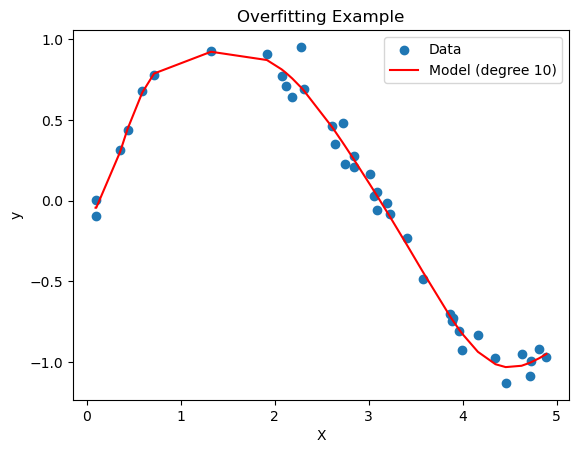

In [5]:
# Plot the data and the fitted curve
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred, color='red', label='Model (degree 10)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting Example')
plt.legend()
plt.show()



In [6]:
# Calculate mean squared error
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.005022037220193083


In this example, the high-degree polynomial tries to fit every single data point precisely, capturing even the noise in the data. While the curve fits the training data well, it does not represent the true underlying pattern (sinusoidal function in this case).

# Underfitting


Continuing with the same dataset, let's fit a linear regression model to the data, which is clearly too simple to capture the underlying quadratic pattern.

In [7]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X[:, np.newaxis], y_true)



LinearRegression()

In [8]:
# Predictions
y_pred = model.predict(X[:, np.newaxis])



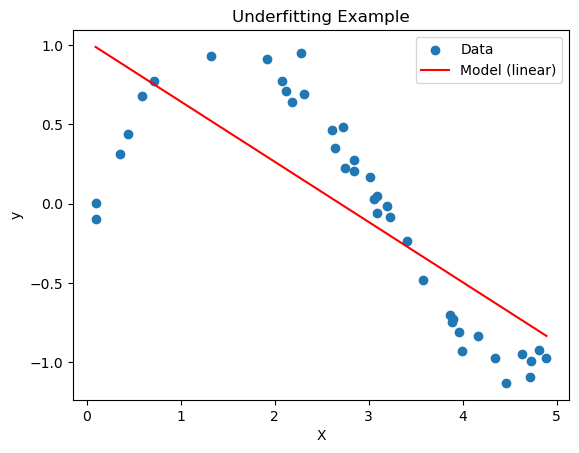

In [9]:
# Plot the data and the fitted curve
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred, color='red', label='Model (linear)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Underfitting Example')
plt.legend()
plt.show()



In [10]:
# Calculate mean squared error
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.17592081709819848


In this case, the linear model is too simple to capture the non-linear pattern of the data, resulting in underfitting. The fitted line does not capture the peaks and troughs of the true underlying pattern.

In both cases, it's essential to strike a balance between model complexity and generalization to unseen data. Regularization techniques like L1 or L2 regularization, cross-validation, and using more data can help mitigate these issues.